In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 500
df = import_data(grid_size)

# Bootstrap Partial Dependence

In [3]:
boot_num = 50

In [4]:
bootstrap_main(df, grid_size, boot_num, do_par = True)

the plot for this is in `partial_dependence_R`

# Single Partial Dependence

Fit a GBRF to the entire dataset and plot the 2D partial dependence for selected features

In [5]:
# fit the gbrf
from sklearn import preprocessing
df_x, target = prepare_lst_prediction(df)
# df_x  = subset_regression_data(df_x, df_x)[0]
vars_drop = ['city','holdout','x','y']
df_x = df_x.drop(vars_drop, axis=1)
# le = preprocessing.LabelEncoder()
# le.fit(cities)
# list(le.classes_)
# le.transform(df_x.city) 
# df_x.city =le.transform(df_x.city) 
gbm_night = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_night.fit(df_x, target['lst_night_mean'])
gbm_day = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_day.fit(df_x, target['lst_day_mean'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=3201,
             subsample=1.0, verbose=0, warm_start=False)

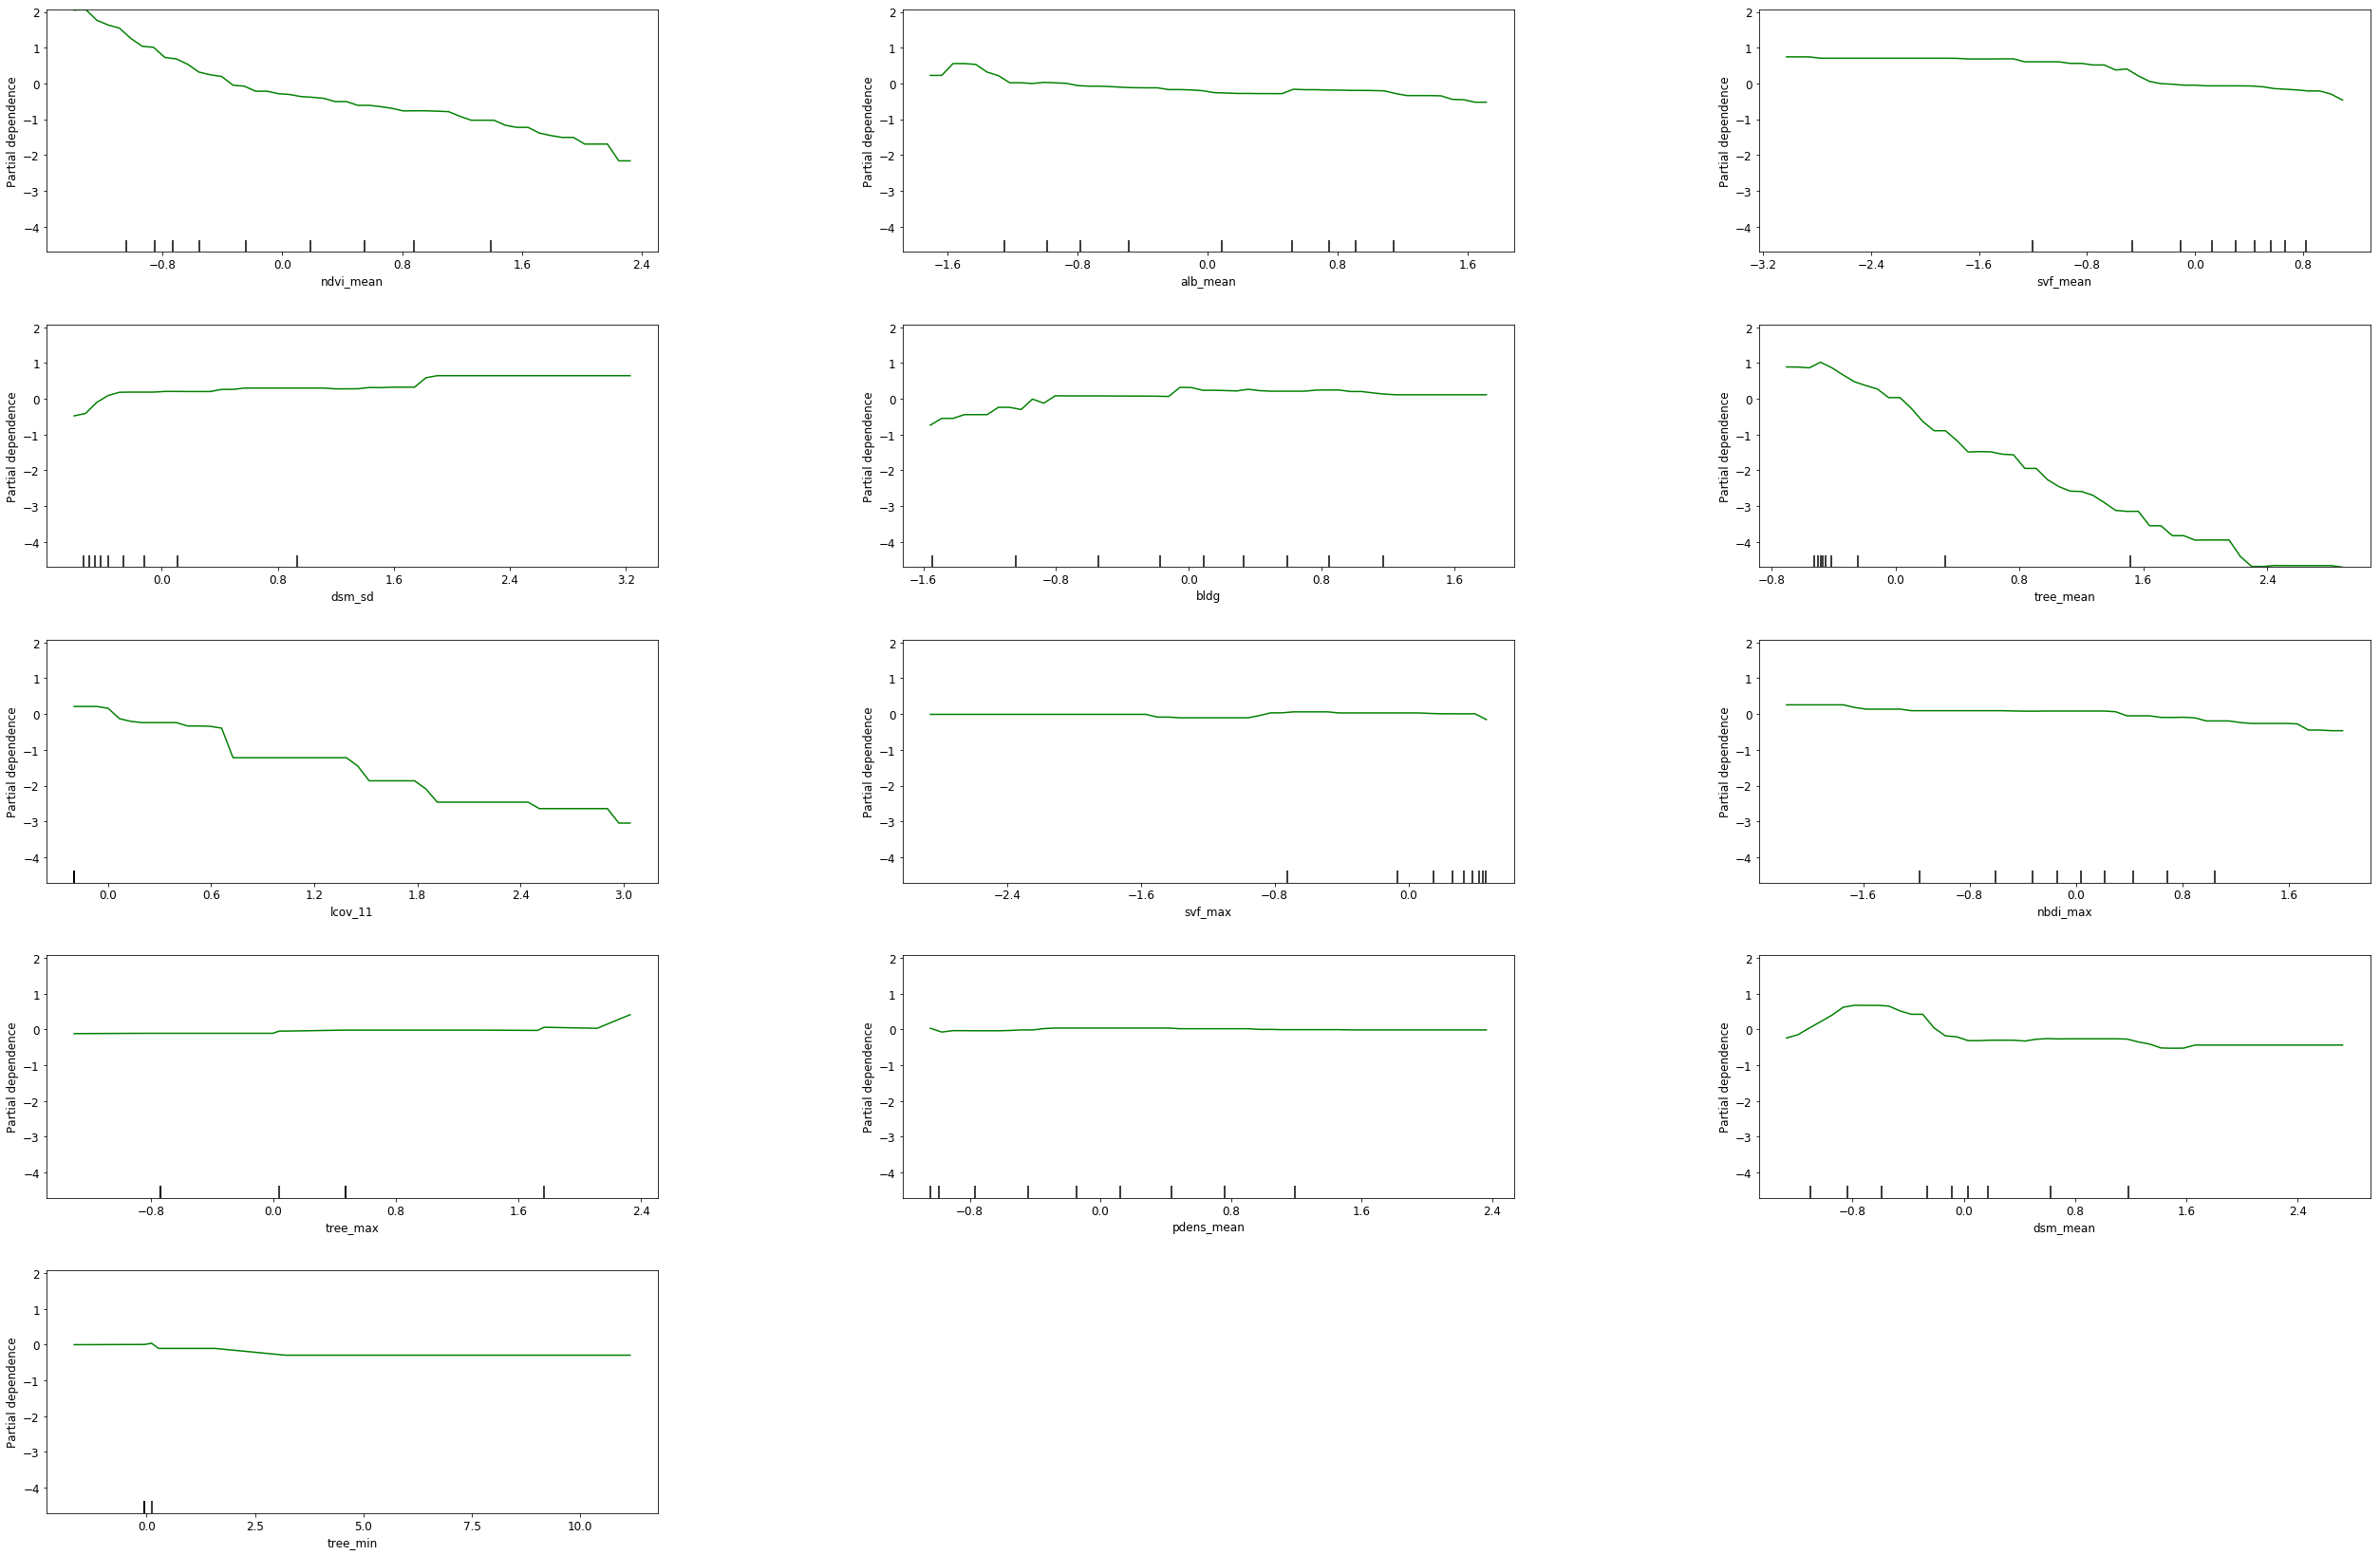

In [6]:
# two way partial dependence

# plot setup (surely this can be a function)
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",]
sns.set_palette(five_thirty_eight)
mpl.rcParams.update({'font.size': 12})
names = list(df_x)
features = [i for i in range(len(names))]
# plt.figure(figsize=(40,20))
fig, axs = plot_partial_dependence(gbm_night, df_x, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50,
                                  figsize=(40,40),
                                  percentiles=(0.025, 0.975))

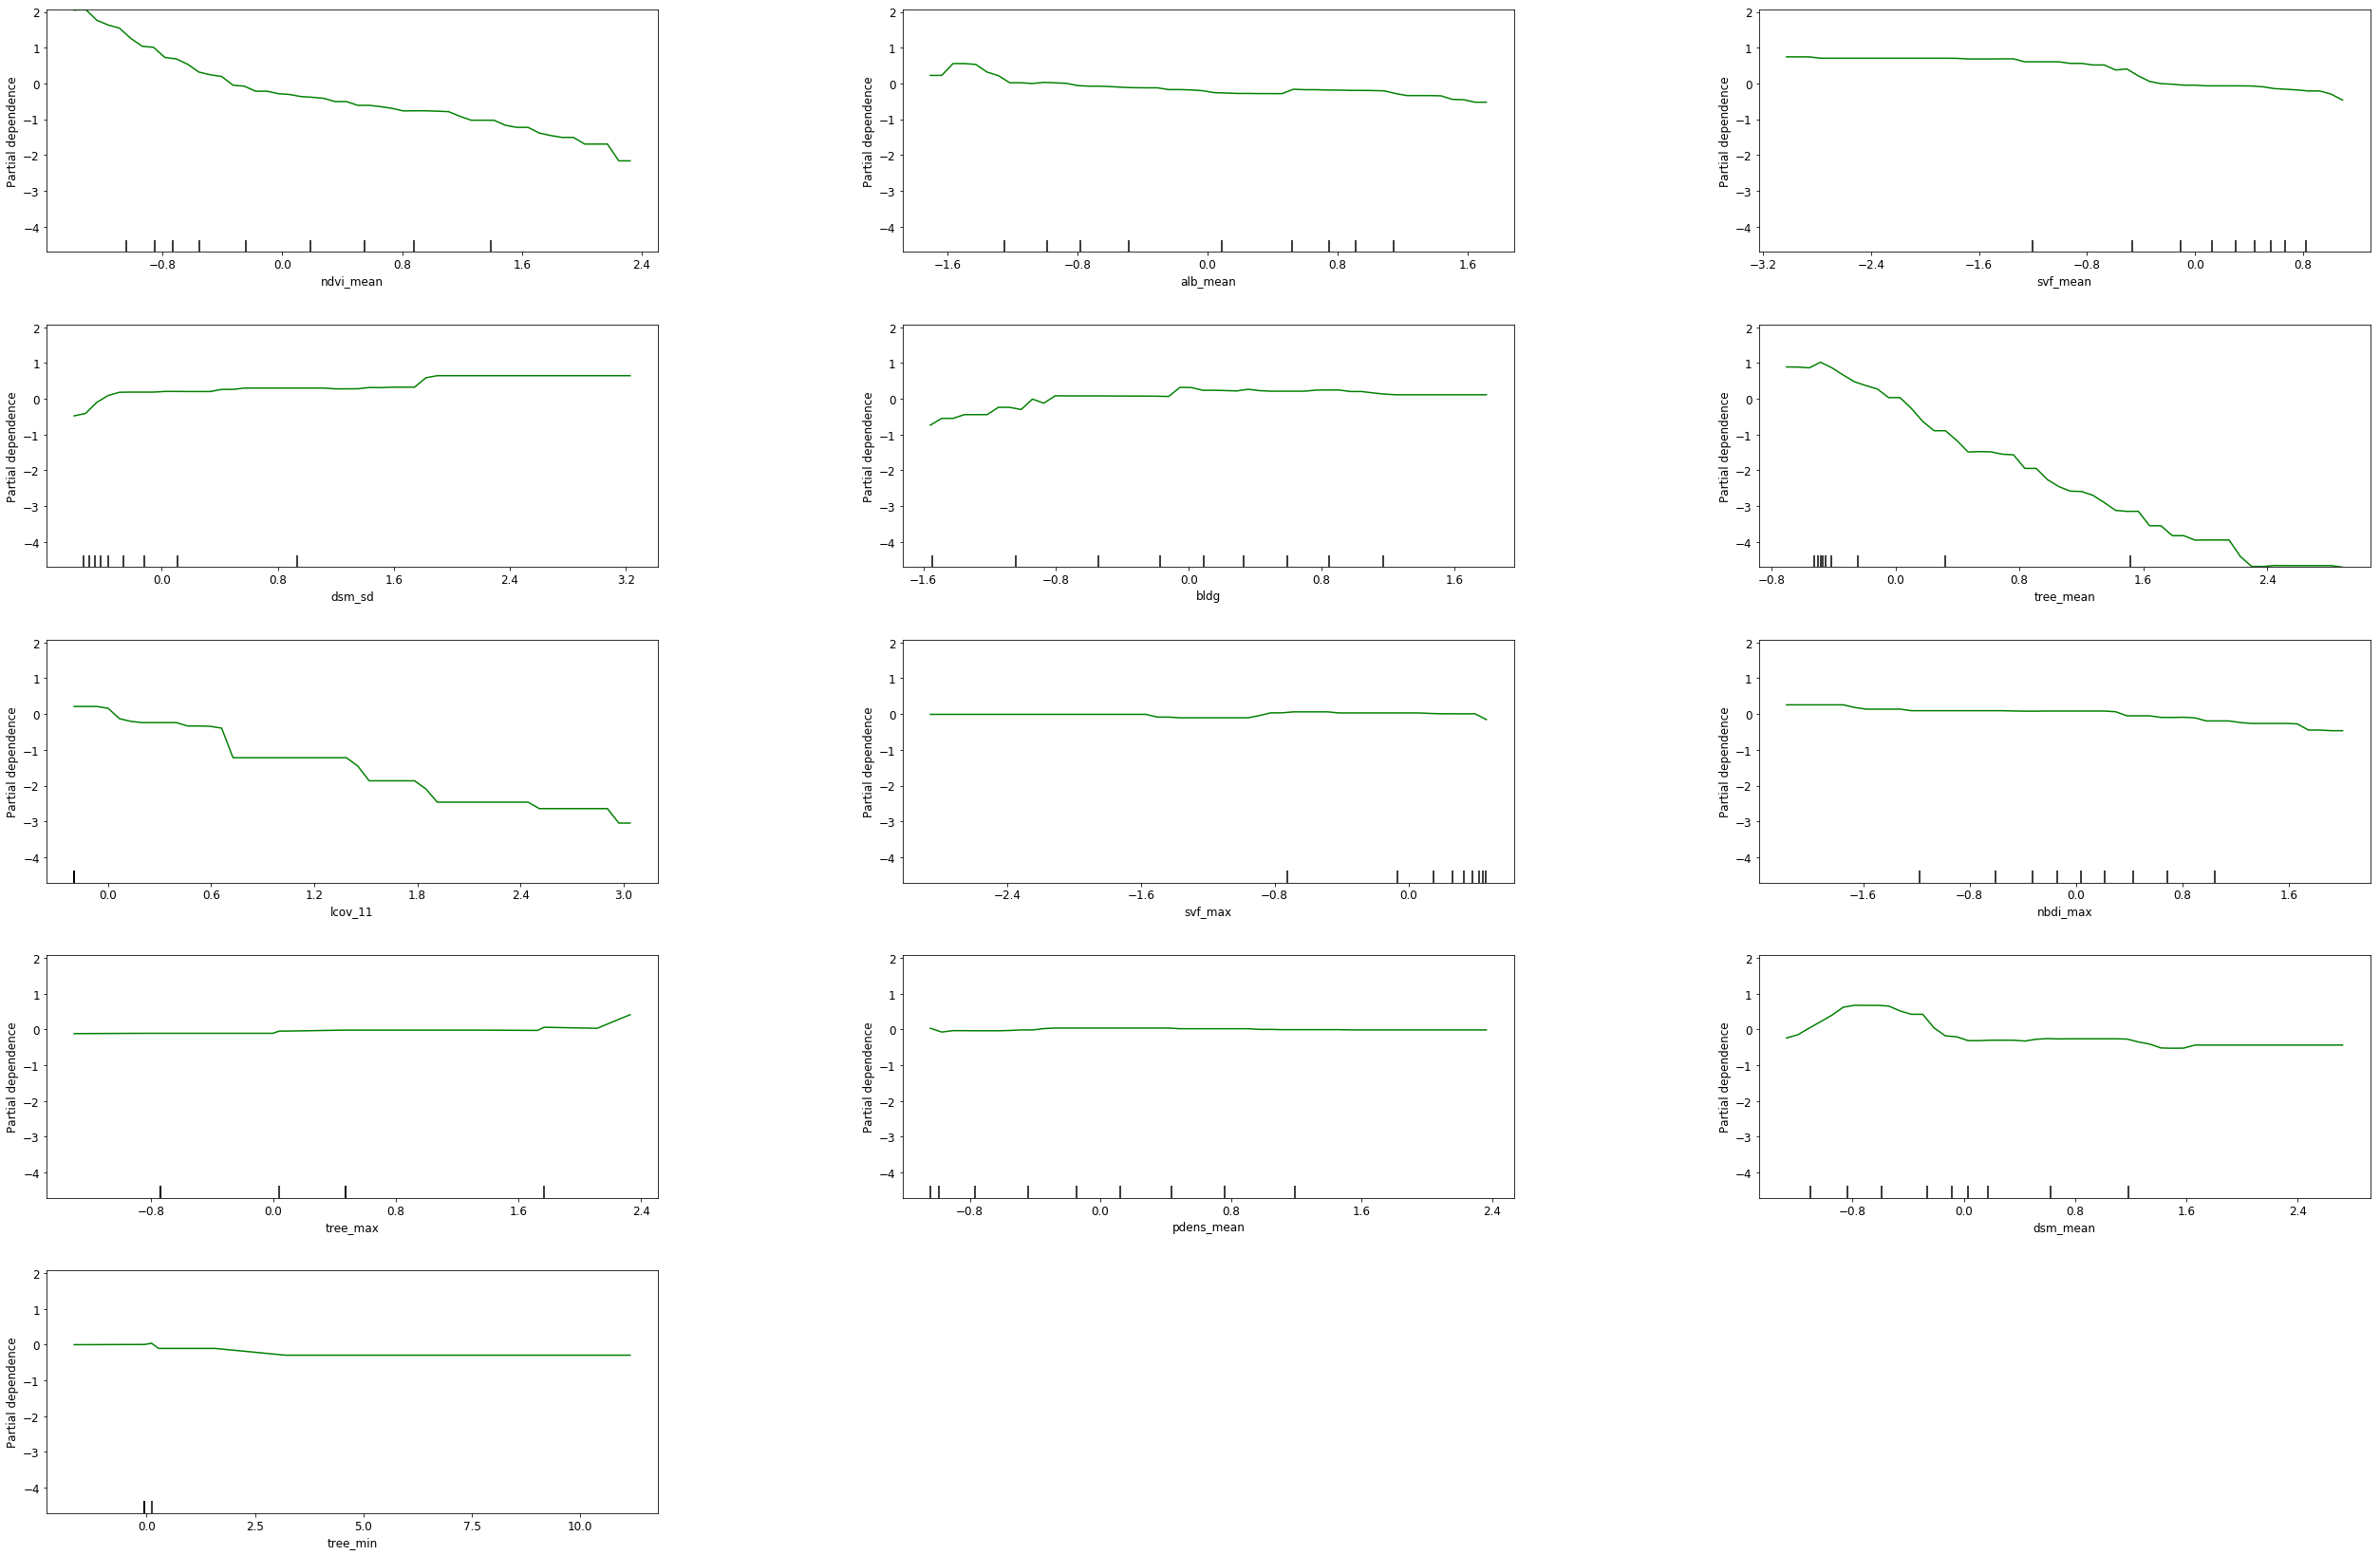

In [7]:
# two way partial dependence

# plot setup (surely this can be a function)
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",]
sns.set_palette(five_thirty_eight)
mpl.rcParams.update({'font.size': 12})
names = list(df_x)
features = [i for i in range(len(names))]
# plt.figure(figsize=(40,20))
fig, axs = plot_partial_dependence(gbm_night, df_x, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50,
                                  figsize=(40,40),
                                  percentiles=(0.025, 0.975))

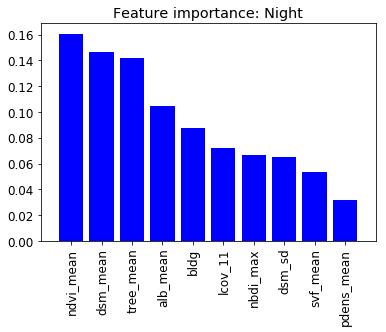

Feature ranking:
1. ndvi_mean (0.16059868275658623)
2. dsm_mean (0.14669313844166598)
3. tree_mean (0.14210520014523847)
4. alb_mean (0.10494608526724356)
5. bldg (0.0875209444420758)
6. lcov_11 (0.07207190555254489)
7. nbdi_max (0.06636209318201107)
8. dsm_sd (0.064916990316094)
9. svf_mean (0.053446289841086035)
10. pdens_mean (0.03163040756209205)
11. tree_max (0.030912097734994936)
12. svf_max (0.026613082101014422)
13. tree_min (0.012183082657352514)


In [8]:
important_num = 10 # top five
importances = gbm_night.feature_importances_
covariates = df_x.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance: Night")
plt.bar(range(important_num), importances[indices[0:important_num]],
       color="b", align="center")
plt.xticks(range(important_num), covariates[indices[0:important_num]], rotation=90)
plt.xlim([-1, important_num])
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)): 
    print("{}. {} ({})".format(f + 1, covariates[indices[f]], importances[indices[f]]))



In [9]:
features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

<a list of 8 text.Text objects>

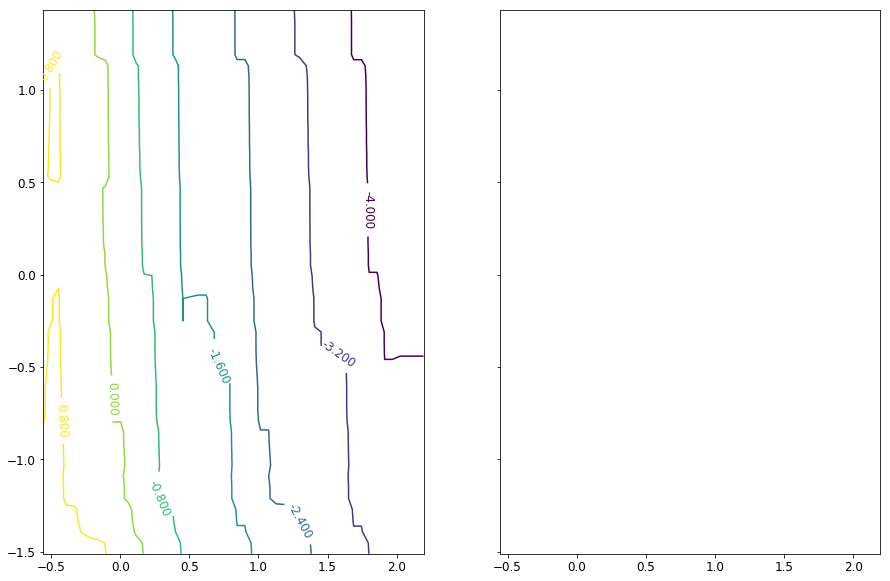

In [10]:
# two way partial dependence

# plot setup (surely this can be a function)
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",]
sns.set_palette(five_thirty_eight)
mpl.rcParams.update({'font.size': 12})
# init subplots (left is nocturnal, right is diurnal)
fig, axes = plt.subplots(1, 2, figsize = (15,10), sharey=True, sharex=True)
# loop through the top n variables by nocturnal importance
feature = 0
features = ['']
levels_set = False
left_right = 0
# for period in ['nocturnal', 'diurnal']:
#     gbm = reg_gbm[period][city]
    # calculate the partial dependence
pdp, ax = partial_dependence(gbm_night, (5, 1), X = df_x,
                        grid_resolution = 50)
# get data
XX, YY = np.meshgrid(ax[0], ax[1])
Z = pdp[0].reshape(list(map(np.size, ax))).T
# add the line to the plot
CS = axes[left_right].contour(XX,YY,Z)#, levels=np.arange(-8,4,1))
axes[left_right].clabel(CS, inline=True, fontsize=12)
# title and axis labels
# axes[feature, left_right].set_title('{} {}'.format(period,city))
#     plt.xlabel('Canopy cover')
#     plt.ylabel('NDVI')